In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

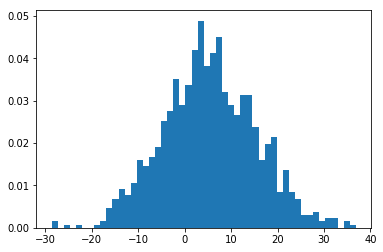

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic, a, data, tolfun=1e-4)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=403062, Fri Nov 10 13:52:22 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.606177919566536e+04 1.0e+00 2.29e-01  2e-01  2e-01 0:00.0
    2     16 1.372745645523456e+04 1.2e+00 2.49e-01  2e-01  3e-01 0:00.1
    3     24 8.210786373559955e+03 1.3e+00 2.55e-01  2e-01  3e-01 0:00.1
   64    512 3.727249654370466e+03 4.2e+01 2.97e-02  6e-03  3e-02 0:03.1
  100    800 3.723870273659668e+03 1.8e+02 1.76e-03  2e-04  1e-03 0:05.2
  130   1040 3.723870142016443e+03 7.9e+02 2.02e-04  5e-06  1e-04 0:07.5
CMAEvolutionStrategyResult(xbest=array([-1.29396194e-06,  2.12913293e-01,  2.82281661e-01,  8.13522601e-02,
        1.11602064e+00]), fbest=3723.870141969667, evals_best=1008, evaluations=1040, iterations=130, xfavorite=array([3.14331857e-08, 2.12999181e-01, 2.82125144e-01, 8.12856960e-02,
       1.11582548e+00]), stds=array([5.19239681e-06, 6.75479359e-05, 9.83085582e-05, 4.83356498e-05,
       8

## Testing output

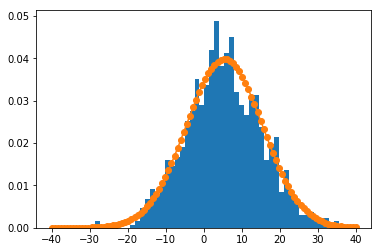

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

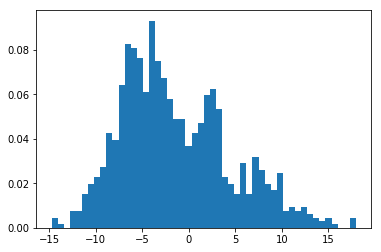

In [11]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [12]:
a = RTBM(1,2)

In [13]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [14]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=449959, Fri Nov 10 13:52:54 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.961298669996663e+03 1.0e+00 1.95e-01  2e-01  2e-01 0:00.0
    2     20 6.321729327172820e+03 1.2e+00 1.91e-01  2e-01  2e-01 0:00.2
    3     30 4.329727658149191e+03 1.2e+00 1.87e-01  2e-01  2e-01 0:00.3
   27    270 3.306007346363269e+03 3.9e+00 1.17e-01  9e-02  1e-01 0:03.4
   57    570 3.206440737563642e+03 1.6e+01 4.26e-02  2e-02  7e-02 0:07.4
   96    960 3.194785437593045e+03 4.4e+01 1.21e-02  3e-03  2e-02 0:12.5
  100   1000 3.194822691500997e+03 5.3e+01 9.79e-03  2e-03  1e-02 0:13.0
  154   1540 3.194758207910975e+03 3.2e+02 2.75e-03  2e-04  5e-03 0:20.2
  200   2000 3.194758171744606e+03 1.5e+03 6.43e-04  1e-05  1e-03 0:26.4
  220   2200 3.194758167393544e+03 2.4e+03 1.04e-03  2e-05  3e-03 0:29.5
CMAEvolutionStrategyResult(xbest=array([-4.42231235e-06,  2.70050836e-01,  2.19648265e-01, -3.17380517e-01,

## Testing output

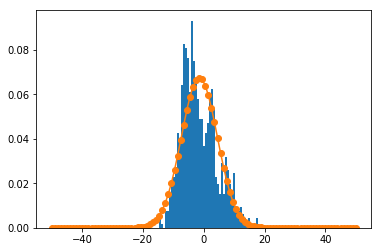

In [15]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')